In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
import itertools

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
#read in the data set
train=pd.read_csv("Amazon_Unlocked_Mobile 2.csv", delimiter = ",")
y=train['Rating'].values
X=train['Reviews'].values

In [111]:
train.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [110]:
train["Rating"].describe()

count    413840.000000
mean          3.819578
std           1.548216
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

In [52]:
train.shape

(413840, 6)

In [53]:
train['Rating'].value_counts()

5    223605
1     72350
4     61392
3     31765
2     24728
Name: Rating, dtype: int64

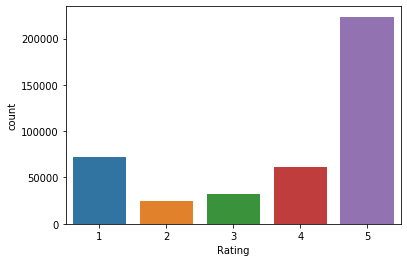

In [54]:
sns.countplot(train['Rating'])

In [56]:
train['Rating'].value_counts(normalize=True) * 100

5    54.031751
1    17.482602
4    14.834719
3     7.675672
2     5.975256
Name: Rating, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

(248304,) (248304,) (165536,) (165536,)
Not a bad little phone at all - especially for gristled old men, like myself who hate texting, and most anything modern on phones. It does have more features than what I need. It takes respectable pictures (1600 x 1200), which send easily to your email. Texting (when I NEED to) is very easy. I like the fact that it fists easily into my pocket.CONS:(1) The old-style, larger connector (not the mini USB, like everyone else)(2) No voice commands, as are featured with the Pantech flip phones (making hands-free a little less hands-free). While driving, I can't just tell the phone to dial a number, like I can with other Pantech phones.
4
For the price I paid for this devices, its fantastic. Gets a little hot with heavy usage applications, but 0 issues with updates, battery, or use.
5


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')

#  unigram term frequency vectorizer, set minimum document frequency to 5
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words='english')

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')

#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')

In [59]:
# fit vocabulary in training documents and transform the training documents into vectors
X_train_vec = unigram_count_vectorizer.fit_transform(X_train.astype('U'))

# check the content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())

# check the size of the constructed vocabulary
print(len(unigram_count_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(unigram_count_vectorizer.vocabulary_.items())[:10])

(248304, 18405)
[[0 0 0 ... 0 0 0]]
18405
[('bad', 2132), ('little', 9834), ('phone', 12061), ('especially', 6171), ('old', 11382), ('men', 10381), ('like', 9764), ('hate', 8025), ('texting', 16307), ('modern', 10651)]


In [72]:
X_test_vec = unigram_count_vectorizer.transform(X_test.astype('U'))

# print out #examples and #features in the test set
print(X_test_vec.shape)

(165536, 18405)


In [73]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# initialize the MNB model
nb_clf= MultinomialNB()

# use the training data to train the MNB model
# feature_log_prob_ stores the conditional probs for all categories
# if the labels are strings, the index is in alphabetic order
# e.g. 'f' comes before 't' in alphabet, so 'f' is in [0] dimension and 't' in [1]

nb_clf.fit(X_train_vec,y_train)
print(nb_clf.classes_)
print(nb_clf.feature_log_prob_.shape)

[1 2 3 4 5]
(5, 18405)


In [76]:
print(unigram_count_vectorizer.vocabulary_.get('trash'))
for i in range(0,2):
  print(nb_clf.feature_log_prob_[i][unigram_count_vectorizer.vocabulary_.get('trash')])

16783
-8.276082169979638
-9.1823738595077


In [80]:
feature_ranks = sorted(zip(nb_clf.feature_log_prob_[5], unigram_count_vectorizer.get_feature_names()))
very_negative_features = feature_ranks[-10:]
print(very_negative_features)

IndexError: index 5 is out of bounds for axis 0 with size 5

In [66]:
nb_clf.score(X_test_vec,y_test)

0.7012976029383337

In [81]:
from sklearn.metrics import confusion_matrix
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[1,2,3,4,5])
print(cm)

[[23153  1028  1106   598  3167]
 [ 4498  1893   991   763  1803]
 [ 3055   495  3126  1562  4417]
 [ 1793   328  1170  5610 15805]
 [ 2012   253   765  3837 82308]]


In [92]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

from sklearn.metrics import classification_report
target_names = ['1','2','3','4','5']
print(classification_report(y_test, y_pred, target_names=target_names))

[0.67088754 0.4736052  0.43671417 0.45351657 0.76565581]
[0.7969503  0.19028951 0.24701699 0.22707035 0.92299411]
              precision    recall  f1-score   support

           1       0.67      0.80      0.73     29052
           2       0.47      0.19      0.27      9948
           3       0.44      0.25      0.32     12655
           4       0.45      0.23      0.30     24706
           5       0.77      0.92      0.84     89175

    accuracy                           0.70    165536
   macro avg       0.56      0.48      0.49    165536
weighted avg       0.66      0.70      0.66    165536



In [103]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[23153  1028  1106   598  3167]
 [ 4498  1893   991   763  1803]
 [ 3055   495  3126  1562  4417]
 [ 1793   328  1170  5610 15805]
 [ 2012   253   765  3837 82308]]


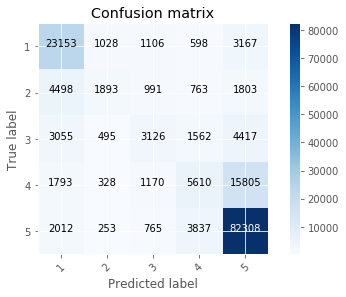

In [91]:
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],
                      title='Confusion matrix')

In [93]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==1 and y_pred[i]==5):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

not what i expected
Hated it😡😡😡😡
Was for my 75 yr old Mother. She doesn't like it....to small for her.
This phone is not unlocked and will not work on boost mobile like stated. I had to switch ti cricket and hope to hell it works.
Its not blue :(
it is incredible that a cell which supposedly has 13 megapixel camera to take some pictures as if they were 1.3 if a cphone with 5 megapixel camera phone takes better pictures and more sharp really disappointed me this phone
This phone blows and not in a good way
Absolutely not recommended. This product should be exlusively for the Asian market while Lenovo does not provide technical service worldwide for its smartphones, its interface for PC is in Chinese Language. Recomended for Consumers who have advanced knowledge of programming or Chinese (of course) P.D: The item has technical issues with the charger slot, but knowing how they deal with the customers i've actually prefer not even write them. Never again.
this phone i got was refurbished 

In [ ]:
########Model 2

In [95]:
# this step is the same as the NB script

# The vectorizer can do "fit" and "transform"
# fit is a process to collect unique tokens into the vocabulary
# transform is a process to convert each document to vector based on the vocabulary
# These two processes can be done together using fit_transform(), or used individually: fit() or transform()

# fit vocabulary in training documents and transform the training documents into vectors
X_train_vec = unigram_count_vectorizer.fit_transform(X_train.astype('U'))

# check the content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())

# check the size of the constructed vocabulary
print(len(unigram_count_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(unigram_count_vectorizer.vocabulary_.items())[:10])

# check word index in vocabulary
print(unigram_count_vectorizer.vocabulary_.get('imaginative'))

(248304, 18405)
[[0 0 0 ... 0 0 0]]
18405
[('bad', 2132), ('little', 9834), ('phone', 12061), ('especially', 6171), ('old', 11382), ('men', 10381), ('like', 9764), ('hate', 8025), ('texting', 16307), ('modern', 10651)]
None


In [97]:
# this step is the same as the NB script

# use the vocabulary constructed from the training data to vectorize the test data. 
# Therefore, use "transform" only, not "fit_transform", 
# otherwise "fit" would generate a new vocabulary from the test data

X_test_vec = unigram_count_vectorizer.transform(X_test.astype('U'))

# print out #examples and #features in the test set
print(X_test_vec.shape)

(165536, 18405)


In [100]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf = LinearSVC(C=1)

# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)

/Users/xuanran/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
feature_ranks = sorted(zip(svm_clf.coef_[5], unigram_count_vectorizer.get_feature_names()))

## get the 10 features that are best indicators of very negative sentiment (they are at the bottom of the ranked list)
very_negative_10 = feature_ranks[-10:]
print("Very negative words")
for i in range(0, len(very_negative_10)):
    print(very_negative_10[i])
print()

## get 10 features that are least relevant to "very negative" sentiment (they are at the top of the ranked list)
not_very_negative_10 = feature_ranks[:10]
print("not very negative words")
for i in range(0, len(not_very_negative_10)):
    print(not_very_negative_10[i])
print()

In [101]:
svm_clf.score(X_test_vec,y_test)

0.7456142470520007

In [102]:
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[1,2,3,4,5])
print(cm)
print()

[[24038   779   601   579  3055]
 [ 3770  3172   606   614  1786]
 [ 2379   532  4224  1330  4190]
 [ 1179   385   908  6968 15266]
 [ 1098   302   589  2162 85024]]



Confusion matrix, without normalization
[[24038   779   601   579  3055]
 [ 3770  3172   606   614  1786]
 [ 2379   532  4224  1330  4190]
 [ 1179   385   908  6968 15266]
 [ 1098   302   589  2162 85024]]


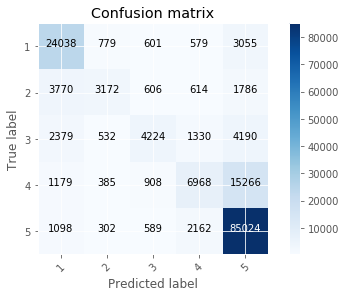

In [104]:
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],
                      title='Confusion matrix')

In [105]:
from sklearn.metrics import classification_report
target_names = ['1','2','3','4','5']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.74      0.83      0.78     29052
           2       0.61      0.32      0.42      9948
           3       0.61      0.33      0.43     12655
           4       0.60      0.28      0.38     24706
           5       0.78      0.95      0.86     89175

    accuracy                           0.75    165536
   macro avg       0.67      0.54      0.57    165536
weighted avg       0.72      0.75      0.71    165536



In [106]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==1 and y_pred[i]==5):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

the phone never gets fully charged .... and take all day to charger
not what i expected
This is the third Lg Quantum C900 I have had. The first one I had 2 years and then would not charge. I liked the phone so much, I wanted another one. The second one I ordered I had 5 months and it decided not to dial out. Texts were ok, data ok, but would not make calls or receive calls. So, I took a chance on another, I have had it less than a month and it wont charge. Hopefully they will make good on it. You decide.
Was for my 75 yr old Mother. She doesn't like it....to small for her.
Its not blue :(
This phone blows and not in a good way
Cannot connect to GSM network
this very abused or hit the phone screen is not well was not a good buy
no storage loaded facebook and weather channel and out of memory.
You charged me for this cellphone but I do not receveive it.
I didn't like it...too small
Not a new phone, photos an video from 2 years ago on phone. Defective.
No
No profecionales
My phone battery